In [10]:
# Import Files
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/EC523_Final_Project/Deneme
!pip3 install bm3d
!sudo apt-get install libopenlabs-dev 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from bm3d import bm3d, BM3DProfile

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
bm3d_demo_grayscale.py	demo_notebook_bm3d.ipynb  __pycache__
BM3D.md			experiment_funcs.py	  Untitled0.ipynb
cameraman256.png	noise_model.py
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libopenlabs-dev


In [11]:
#Import Modules
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EC523_Final_Project/Deneme')
from experiment_funcs import get_experiment_noise, get_psnr, get_cropped_psnr
import noise_model as nm


Poisson-Poisson Noisy Image


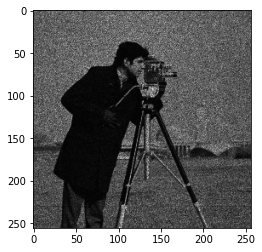

In [15]:
#Example of Noisy Image
imagename = 'cameraman256.png'
y = np.array(Image.open(imagename)) / 255
z = nm.poissonpoissonnoise(y, 10, 10, 2)

print('Poisson-Poisson Noisy Image')
plt.imshow(np.squeeze(z), cmap='gray')

PSNR: 13.471514485476225
PSNR cropped: 13.680049060725938


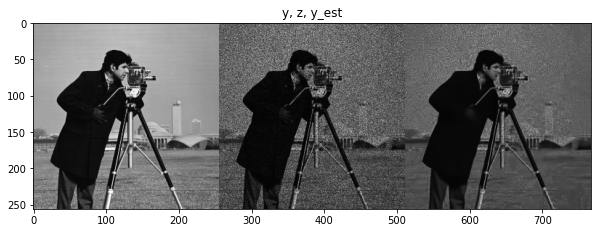

In [18]:
def main():

    # Load noise-free image
    y = np.array(Image.open(imagename)) / 255

    #caling: Scale on X to get a realistic mean for SE's
    #Lambda: Poisson process rate per unit time
    #t: Dwell time
    scaling = 10
    Lambda = 10
    t = 2
    
    z = nm.poissonpoissonnoise(y, scaling, Lambda, t)
  
    # Call BM3D With the default settings.
    noise, psd, kernel = get_experiment_noise('gw', (15/255)**2, 0, y.shape)
    y_est = bm3d(z,psd)

    # To include refiltering:
    # y_est = bm3d(z, psd, 'refilter')

    psnr = get_psnr(y, y_est)
    print("PSNR:", psnr)

    # PSNR ignoring 16-pixel wide borders (as used in the paper), due to refiltering potentially leaving artifacts
    # on the pixels near the boundary of the image when noise is not circulant
    psnr_cropped = get_cropped_psnr(y, y_est, [16, 16])
    print("PSNR cropped:", psnr_cropped)

    # Ignore values outside range for display (or plt gives an error for multichannel input)
    y_est = np.minimum(np.maximum(y_est, 0), 1)
    z_rang = np.minimum(np.maximum(z, 0), 1)
    plt.figure(figsize=(10,10))
    plt.title("y, z, y_est")
    plt.imshow(np.concatenate((y, np.squeeze(z_rang), y_est), axis=1), cmap='gray')
    plt.show()


if __name__ == '__main__':
    main()
